In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [141]:
#list(colormaps)

In [142]:
data

,CV1,CV2,free energy (kJ/mol)
0,-3.00,0.35,inf
1,-2.94,0.35,inf
2,-2.88,0.35,inf
3,-2.82,0.35,inf
4,-2.76,0.35,74.2243
...,...,...,...
10196,2.76,2.00,64.8763
10197,2.82,2.00,71.7064
10198,2.88,2.00,81.7440
10199,2.94,2.00,88.9227


In [144]:
def create_contour_plot():
    # read and transform your data here
    
    data = pd.read_csv("/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/fes.csv")
    
    X = data['CV1'].values
    Y = data['CV2'].values
    Z = data['free energy (kJ/mol)'].values

    # create your contour plot here
    
    valid_mask = np.isfinite(X) & np.isfinite(Y) & np.isfinite(Z)
    X, Y, Z = X[valid_mask], Y[valid_mask], Z[valid_mask]
    
    #Grid reshape 1D to 2D. (grid_szie, grid_size) <- turple 
    grid_size = int(np.sqrt(len(X)))
    X = X[:grid_size*grid_size].reshape((grid_size,grid_size)) 
    Y = Y[:grid_size*grid_size].reshape((grid_size,grid_size)) 
    Z = Z[:grid_size*grid_size].reshape((grid_size,grid_size)) 
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    levels = np.linspace(Z.min(),Z.max(),num=20)
    contour = ax.contourf(X, Y, Z, levels = levels, cmap='CMRmap')
    ax.set_xlabel('CV1 (units)')
    ax.set_ylabel('CV2 (units)')
    ax.set_title('2D Contour Plot of Free Energy Surface')
    cbar1 = plt.colorbar(contour)
    cbar1.set_label('colorbar')
     
    # create your 3D surface plot here
    fig = plt.figure(figsize=(15,5))
    ax2 = fig.add_subplot(projection='3d')
    contour_3D = ax2.plot_surface(X, Y, Z, vmin=Z.min(), vmax=Z.max(),cmap='CMRmap')
    cbar2 = plt.colorbar(contour_3D)
    cbar2.set_label( 'colorbar')
    
    ax2.set_xlabel('CV1')
    ax2.set_ylabel('CV2')
    ax2.set_zlabel('Free Energy')
    ax2.set_title('3D Contour Plot of Free Energy Surface')
    
    # save your plot
    plt.savefig("contour.png")

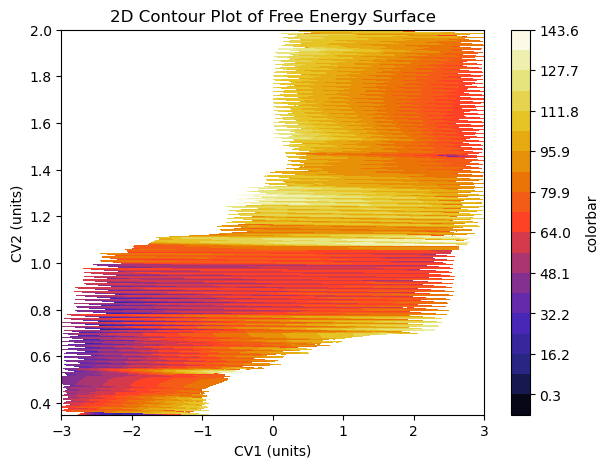

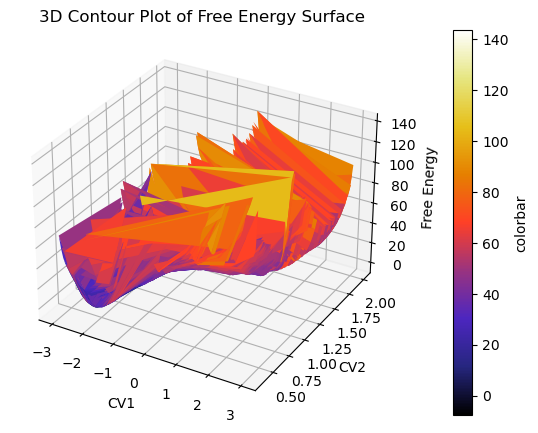

In [145]:
create_contour_plot()